<a href="https://colab.research.google.com/github/gbinmakhashen/Data-Science/blob/main/OLS_method_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ordinary Least Squares **
OLS Estimates $\hat{\beta}$ in such a way that the sum of squares of residuals is as small as possible. That is the loss function

$L(\hat{\beta}) = \sum^{n}_{i=1} (y_i - X' \hat{\beta})^2 $

The OLS parameters can be estimated using the following:
 $ \hat{\beta}_{OLS}=(X'X)^{-1}(X'Y) $


In the following, 2 examples are given
1- generating random data and using random parameters
2- use the OLS estimator to find out the hidden paramters (Regression Coeffecients)

Note: the data can be genrated without noise. There are two versions below


In [3]:
# load required libraries
import numpy as np
import matplotlib.pyplot as plt

In [226]:
 # Generate some data
 # x: indpendent varaible
 # y: response
 
 x = np.array(np.zeros(shape=(1,3)))
 for k in range (5):
  tmp = np.array(np.random.randint(0,50,size=3))
  x =np.insert(x, k, np.array(tmp), 0) 

# remove the zeros added in the first step
x = np.delete(x,x.shape[0]-1, 0)

y = np.array(np.zeros(shape=(1,1)))
# hidden parameters
Bo1 = np.random.randn()
Bo2 = np.random.randn()
Bo3 = np.random.randn()
idx = 0
for xi in x:
  # with noise
  y = np.insert(y, idx,  xi[0] * Bo1 + xi[1] * Bo2+ xi[2] * Bo3 + np.random.randn(), 0)
  # without noise
  #y = np.insert(y, idx,  xi[0] * Bo1 + xi[1] * Bo2+ xi[2] * Bo3, 0)
  idx +=1

# remove the zeros added in the first step
y = np.delete(y,y.shape[0]-1, 0)

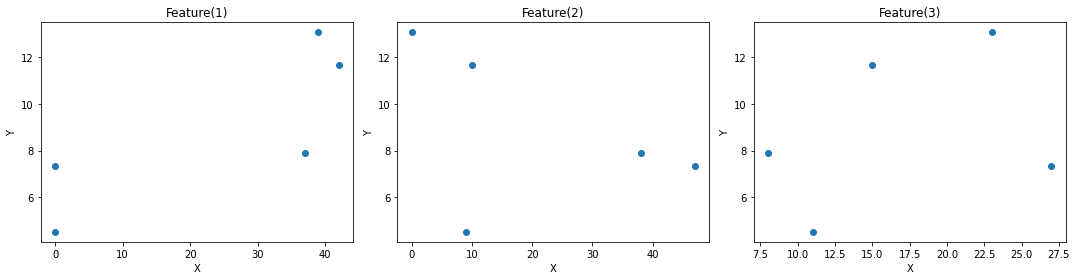

In [224]:
# Visualize the data
i = 1
plt.figure(figsize=(15,4))
for xi in x.T:
    plt.subplot(1,3,i) 
    plt.scatter(xi, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Feature('+str(i) +')')
    i +=1
plt.tight_layout()


In [213]:
# Check tht generate data
print('Independent:\n', x, '\nResponse:\n', y)

Independent:
 [[11. 21.  5.]
 [11. 45. 20.]
 [35. 17. 38.]
 [47.  2.  3.]
 [39. 40.  6.]] 
Response:
 [[1.90909091]
 [2.36363636]
 [1.90909091]
 [2.81818182]]


# What are the used parameters ?? using regression we can find them
In order to obtain the OLS parameter estimates:
 $ \hat{\beta}_{OLS}=(X′X)^{-1}(X′Y) $


In [191]:
#B =np.linalg.pinv(x.T * x) * (x.transpose() * y) # for one D arrays or one element
B = np.dot(np.linalg.pinv(np.dot(x.T, x)) , np.dot(x.T , y ) )

In [192]:
# Checkout the results of the closed form  B = (X'X)^-1 (X'Y)
print( 'Original Coeffeicients:%.3f,%.3f,%.3f'% (Bo1, Bo2, Bo3) )
print( 'Computed Coeffeicients:%.3f,%.3f,%.3f'%(B[0,0], B[1,0], B[2,0] ) )

Original Coeffeicients:-0.590,1.033,-0.096
Computed Coeffeicients:-0.590,1.033,-0.096


Remember the error added to the equation has influence to compute the parameters. 

In [206]:
# example 2 using fixed values
x2 = np.array([[1,1], [1,2], [1,1], [1,3]])
y2  = np.array([[1.90909091],
                [2.36363636],
                [1.90909091],
                [2.81818182]])


array([[1.90909091],
       [2.36363636],
       [1.90909091],
       [2.81818182]])

In [207]:
# compute the coeffecients (parameters) OLS estimator
B = np.dot(np.linalg.inv(np.dot(x2.T, x2)), np.dot(x2.T, y2))

In [208]:
B

array([[1.45454545],
       [0.45454545]])

In [210]:
# find response 
y3 = np.dot(x2, B)

In [211]:
y3

array([[1.90909091],
       [2.36363636],
       [1.90909091],
       [2.81818182]])